# Proyecto Final Reservas de Hotel

 **Abstract**

Las cancelaciones de reservas representan un gran desafío para la industria hotelera, afectando la planificación operativa y la rentabilidad. En este estudio, se desarrolla un modelo de predicción de cancelaciones utilizando las herramientas necesarias. A partir de un conjunto de datos de reservas hoteleras, se analizan distintas variables y se utilizan análisis univariados, bivariados y multivariados para comprender las relaciones entre estas y su impacto en la cancelación. Posteriormente, se construye un modelo de clasificación para predecir la probabilidad de cancelación de una reserva. Los resultados obtenidos proporcionan información valiosa para que los hoteles mejoren sus estrategias de gestión y disminuyan los efectos de cancelaciones inesperadas.

**Contexto Comercial**

En la industria hotelera, la cancelación de reservas representa un problema recurrente que impacta la ocupación, los ingresos y la planificación operativa. La alta tasa de cancelaciones puede generar pérdidas económicas debido a la imposibilidad de reasignar las habitaciones a nuevos huéspedes a tiempo. Además, afecta la gestión de recursos y la satisfacción de los clientes. Por esto, predecir qué reservas tienen una alta probabilidad de cancelación permite a los hoteles implementar estrategias, como políticas de tarifas no reembolsables, sobreventa controlada y campañas dirigidas a clientes con mayor probabilidad de cancelar.

**Contexto Analítico**

Desde una perspectiva analítica, el objetivo es desarrollar un modelo de predicción basado en datos históricos de reservas de hotel. Se analizan variables clave como el lead time, que es el tiempo de anticipación con el que se realiza la reserva, el precio promedio por habitación, si el cliente es repetido, y las solicitudes especiales que realice, para identificar patrones que estén relacionados con la cancelación. Se utilizan técnicas para entrenar un modelo de clasificación que permita anticipar las cancelaciones. Este enfoque ayudará a los hoteles a tomar decisiones basadas en datos y optimizar su gestión de reservas.

**Preguntas/Hipótesis**

**Preguntas**

1 ¿Cómo influye el tiempo de anticipación de la reserva (lead time) en la probabilidad de cancelación?

2 ¿Los clientes con más solicitudes especiales cancelan menos?

3 ¿Los huéspedes que han reservado antes sin cancelar son más propensos a completar su estadía?

4 ¿Los clientes repetidos tienen un menor porcentaje de cancelaciones en comparación con nuevos huéspedes?

**Hipótesis**

1 Mientras mas alto es el lead time, mas probabilidad de que la reserva sea cancelada.

2 Las reservas con más solicitudes especiales tienen menor probabilidad de cancelación

3 Los huéspedes repetidos tienen menor probabilidad de cancelar en comparación con nuevos clientes.

4 Los clientes con un historial de reservas previas no canceladas tienen menor probabilidad de cancelar


**Objetivo:**

Desarrollar un modelo de clasificación predictivo para anticipar la cancelación de reservas, utilizando **booking_status** como variable objetivo. Se buscará identificar patrones que influyen en la cancelación. Esto permitirá a los hoteles optimizar la gestión de reservas, reducir pérdidas financieras y diseñar estrategias de mitigación, como sobreventa controlada, descuentos por pago anticipado y ajustes en políticas de cancelación.

#Lectura de datos

**Diccionario de variables**

 0   Booking_ID: numero de identificacion unico                           
 1   no_of_adults: número de adultos  
 2   no_of_children: número de niños           
 3   no_of_weekend_nights: número de noches en fin de semana          
 4   no_of_week_nights: número de noches en dias de semana  
 5   type_of_meal_plan: tipo de plan de comidas   
 6   required_car_parking_space: requiere espacio de estacionamiento  
 7   room_type_reserved: tipo de habitación reservada   
 8   lead_time: dias de anticipación de reserva   
 9   arrival_year: año de llegada   
 10  arrival_month: mes de llegada         
 11  arrival_date: día de llegada                  
 12  market_segment_type: segmentacion de mercado             
 13  repeated_guest: cliente recurrente          
 14  no_of_previous_cancellations: número de cancelaciones previas      
 15  no_of_previous_bookings_not_canceled:  número de reservas no canceladas previas
 16  avg_price_per_room: promedio precio por habitación
 17  no_of_special_requests: numero de solicitudes especiales              
 18  booking_status: estado de la reserva

In [3]:
#Librerias utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

In [4]:
# Leer el dataset
url= 'https://raw.githubusercontent.com/fiamma-rivero/proyectoReservas/refs/heads/main/Hotel%20Reservations.csv'
df= pd.read_csv(url,sep=',')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
#utilizamos el metodo shape para mostrar la dimension del dataset
df.shape

(36275, 19)

In [6]:
# utilizamos el metodo info para identificar nulos y el tipo de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#Se utiliza el metodo head para mostrar las primeras filas del dataset
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
#utilizamos el metodo describe para mostrar un resumen de los datos estadisticos del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


# Transformacion y limpieza de datos

**verificacion de nulos**

In [9]:
sum(df.isnull().sum())

0

No existen valores nulos en el dataset

**verificacion de duplicados**

In [10]:
df.duplicated().sum()

np.int64(0)

No existen valores duplicados en el dataset

**verificacion de outliers**

In [11]:
# Variables a analizar
selected_vars = ["lead_time", "avg_price_per_room", "no_of_special_requests"]

# Calcular los límites de outliers con IQR
outliers_info = {}
for var in selected_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    outliers_info[var] = len(outliers)

# Mostrar cantidad de outliers detectados
print(outliers_info)


{'lead_time': 1331, 'avg_price_per_room': 1696, 'no_of_special_requests': 761}


Se detectan valores outliers, pero serán conservados ya que los valores extremos corresponden a reservas reales con alta probabilidad de cancelación o no cancelación, eliminarlos podría sesgar el modelo y reducir su capacidad predictiva.

# Analisis Exploratorio de datos

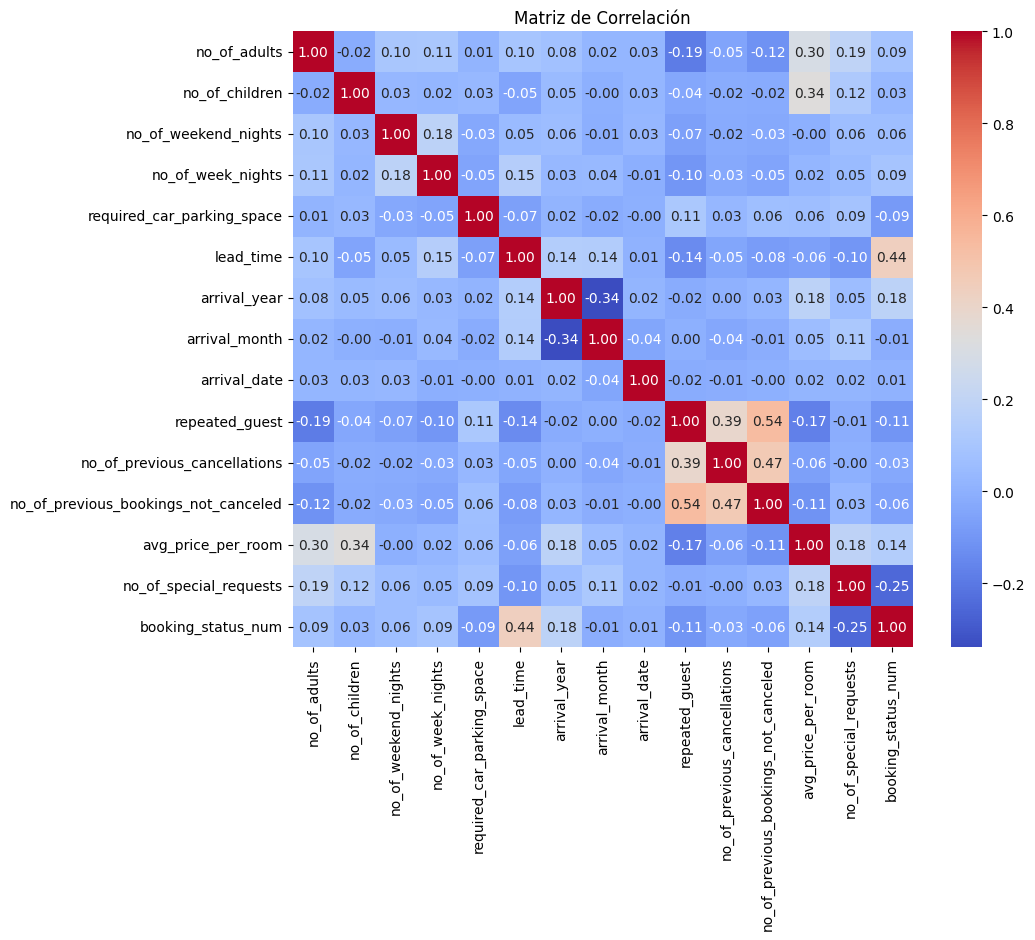

In [12]:
# Convertir booking_status a valores numéricos (1 = Canceled, 0 = Not_Canceled)
df['booking_status_num'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

La información que nos ofrecen la correlación de las variables es que: Lead time, no_of_special_requests,  repeated_guest, avg_price_per_room son varibles que pueden servir para nuestro modelo de prediccion.

**Gráfico Univariado**

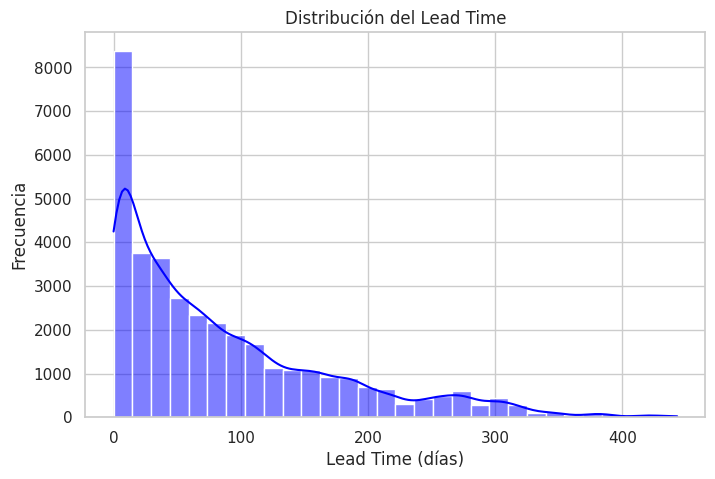

In [13]:

# Configuración general del estilo
sns.set(style="whitegrid")

#Gráfico Univariado: Histograma de Lead Time
plt.figure(figsize=(8, 5))
sns.histplot(df["lead_time"], bins=30, kde=True, color="blue")
plt.title("Distribución del Lead Time")
plt.xlabel("Lead Time (días)")
plt.ylabel("Frecuencia")
plt.show()



**Interpretacion**

 El gráfico muestra como se distribuyen los tiempos de anticipación de una reserva. Se puede observar una distribución sesgada hacia la derecha. La mayoria de las reservas se realízan con un corto tiempo de anticipación, a medida que el lead time aumenta la cantidad de reservas disminuye. Existen algunos valores atípicos con mas de 300 días de anticipación.
 Existe una gran cantidad de reservas con menos de 15 dias de anticipación, lo que significa que muchas personas hacen reservas a ultimo momento.

**Gráfico Bivariado**

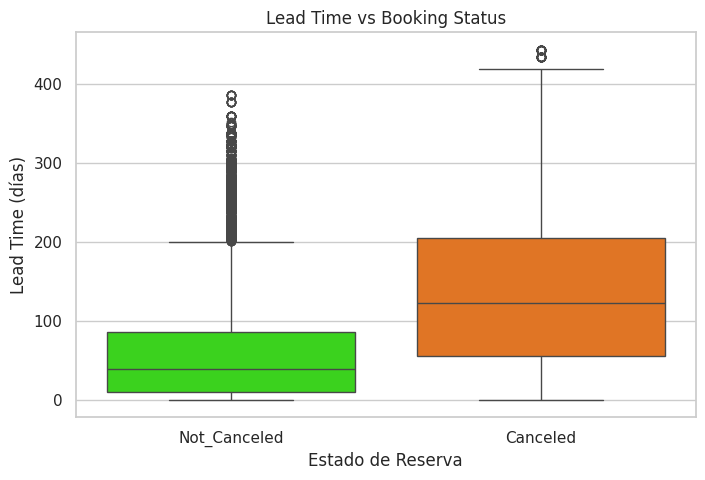

In [14]:
#Gráfico Bivariado: Boxplot de Lead Time según Booking Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["booking_status"], y=df["lead_time"], hue=df["booking_status"], palette='gist_ncar', legend=False)
plt.title("Lead Time vs Booking Status")
plt.xlabel("Estado de Reserva")
plt.ylabel("Lead Time (días)")
plt.show()

**Interpretacion**

Este gráfico nos permite ver si el lead time tiene diferencias entre las reservas canceladas y no canceladas.
Lo que se puede observar en el grafico es que las reservas no canceladas tienen un lead time mas bajo, la mayoria de las reservas se hacen con menos de 100 dias de anticipación, se observan valor atípicos mayor a 200. Las reservas canceladas poseen mayor variabilidad, y se puede observar que muchas de las reservas se realizaron con mas de 100 dias de anticipación, se observan valores atípicos mayor a 400.

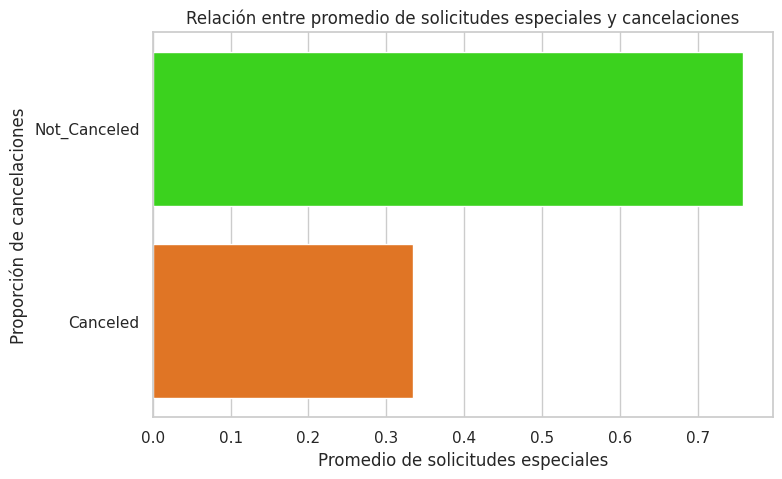

In [15]:
#Gráfico Bivariado: Barplot de relacion entre promedio de solicitudes y booking status
plt.figure(figsize=(8,5))
sns.barplot(x="no_of_special_requests", y="booking_status", data=df, errorbar=None, estimator=lambda x: sum(x)/len(x),  hue="booking_status", dodge=False, palette='gist_ncar', legend=False)
plt.xlabel("Promedio de solicitudes especiales")
plt.ylabel("Proporción de cancelaciones")
plt.title("Relación entre promedio de solicitudes especiales y cancelaciones")
plt.show()
plt.show()


**Interpretación**

Los clientes que NO cancelaron tienen, en promedio, más solicitudes especiales en cambio los clientes que cancelaron tienen, en promedio, menos solicitudes especiales.
Esto sugiere que los huéspedes que hacen más solicitudes suelen ser más comprometidos con su reserva y menos propensos a cancelarla.

**Gráfico Multivariado**

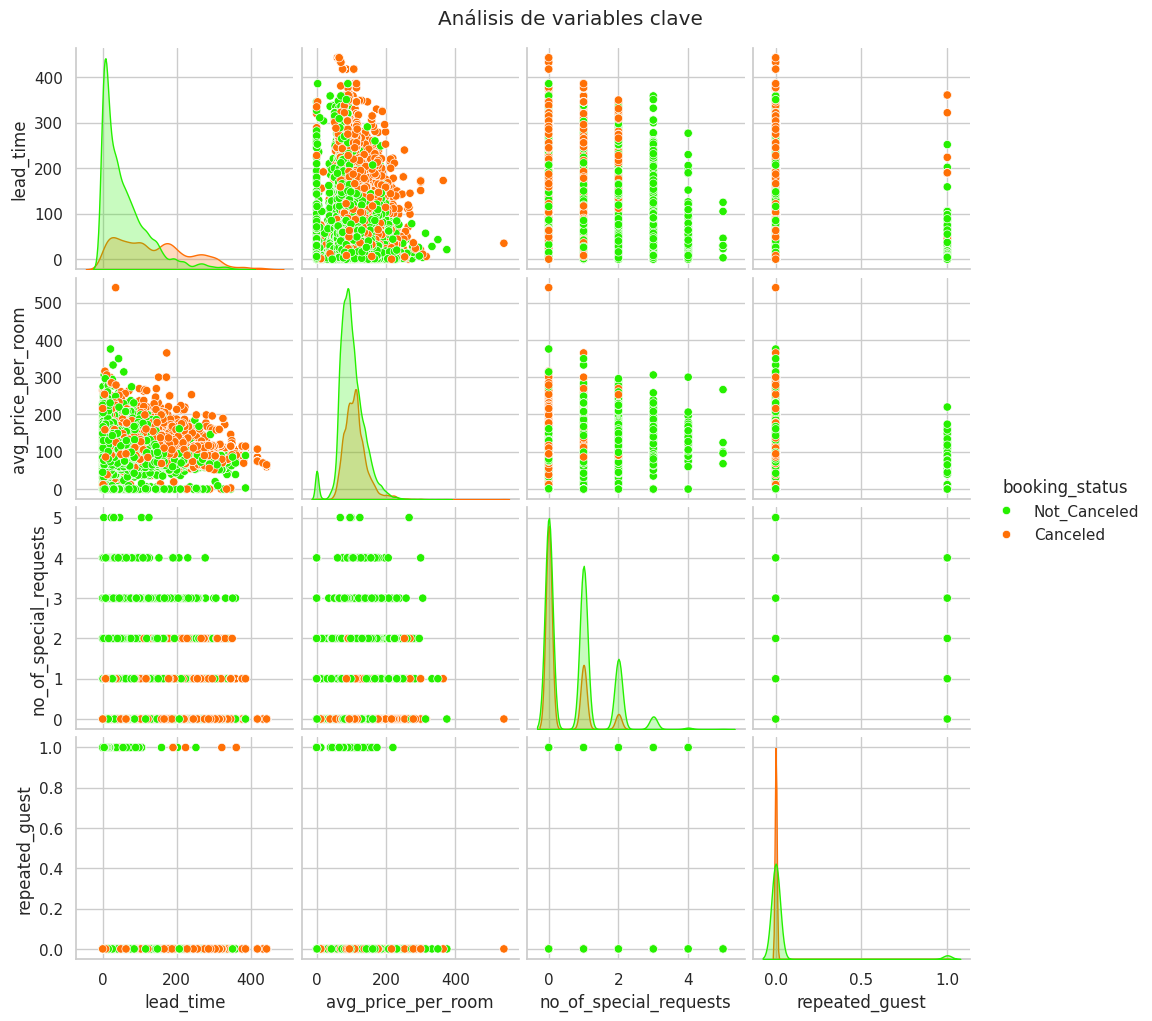

In [16]:
# Pairplot de las variables clave
selected_columns = ["lead_time", "avg_price_per_room", "no_of_special_requests", "repeated_guest", "booking_status"]
sns.pairplot(df[selected_columns], hue='booking_status', palette='gist_ncar')
plt.suptitle('Análisis de variables clave', y=1.02)
plt.show()


**Interpretación**

**Lead Time** (Tiempo de anticipación de la reserva): en la diagonal, se observa que la mayoría de las reservas tienen un lead time bajo.
En los puntos dispersos, se nota que hay más cancelaciones cuando el lead time es alto.
Esto sugiere que las reservas hechas con mucha anticipación tienen mayor probabilidad de cancelarse.

**Avg Price per Room** (Precio promedio por habitación):Las reservas con precios más altos parecen tener más cancelaciones, pero la mayoría de las reservas se concentran en precios más bajos.
Hay más reservas no canceladas en precios medios y bajos.

**No. of Special Requests** (Número de solicitudes especiales):La densidad muestra que quienes hacen más solicitudes especiales suelen cancelar menos.
Esto sugiere que los huéspedes que hacen más solicitudes son más propensos a completar su estadía.

**Repeated Guest** (Huésped repetido: 0 = Nuevo, 1 = Repetido):Se nota que los huéspedes repetidos casi no cancelan
Los huéspedes nuevos, muestran más cancelaciones.
Esto indica que los huéspedes que han reservado antes son más confiables.

**Conclusiones Generales del EDA**


La mayoría de las reservas se hacen con poco tiempo de anticipación, pero cuando el lead time es alto, la probabilidad de cancelación aumenta significativamente.

Aunque la mayoría de las reservas se concentran en precios bajos y medios, hay una tendencia a que las reservas más costosas se cancelen con mayor frecuencia.

Los huéspedes que realizan más solicitudes especiales suelen completar su estadía con mayor frecuencia, lo que sugiere que están más comprometidos con su reserva.

Se observa que los clientes que ya han reservado anteriormente muestran una menor tasa de cancelación en comparación con los nuevos huéspedes.

#Preprocesamiento de datos


In [17]:
# Eliminar columna irrelevante
df.drop(columns=['Booking_ID'], inplace=True)

In [18]:
# Codificar variables categóricas
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type' ]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [19]:
# Separar características y variable objetivo
X = df[['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'repeated_guest', 'room_type_reserved']]
y = df['booking_status_num']

In [20]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Escalar variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Modelos utilizados

**KNN**

In [22]:
# Entrenar el modelo
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred_knn = knn.predict(X_test_scaled)

# Resultados
print("Reporte de Clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))


Reporte de Clasificación para KNN:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4878
           1       0.80      0.72      0.76      2377

    accuracy                           0.85      7255
   macro avg       0.84      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



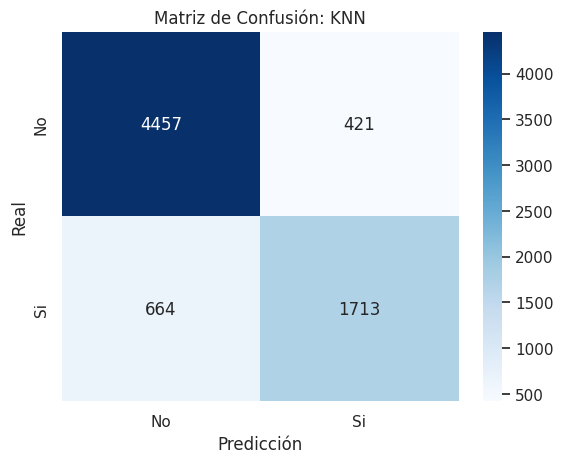

In [23]:
# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Si'], yticklabels=['No', 'Si'])
plt.title("Matriz de Confusión: KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Regresión Lógistica**

In [24]:
# Entrenar el modelo
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred_log = log_reg.predict(X_test_scaled)

# Resultados
print("Reporte de Clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_log))


Reporte de Clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4878
           1       0.74      0.54      0.62      2377

    accuracy                           0.79      7255
   macro avg       0.77      0.72      0.74      7255
weighted avg       0.78      0.79      0.78      7255



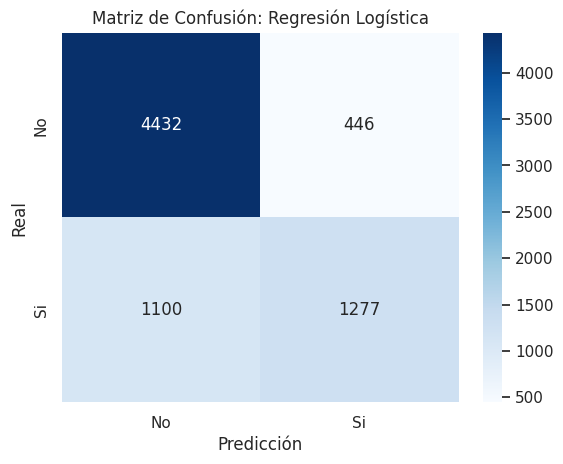

In [25]:
# Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Si'], yticklabels=['No', 'Si'])
plt.title("Matriz de Confusión: Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Arbol de decisión**

In [26]:
#Entrenar el modelo
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_scaled, y_train)

#Evaluar el modelo
y_pred_tree = dec_tree.predict(X_test_scaled)

#Resultados
print("Reporte de Clasificación para Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))


Reporte de Clasificación para Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4878
           1       0.78      0.75      0.76      2377

    accuracy                           0.85      7255
   macro avg       0.83      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



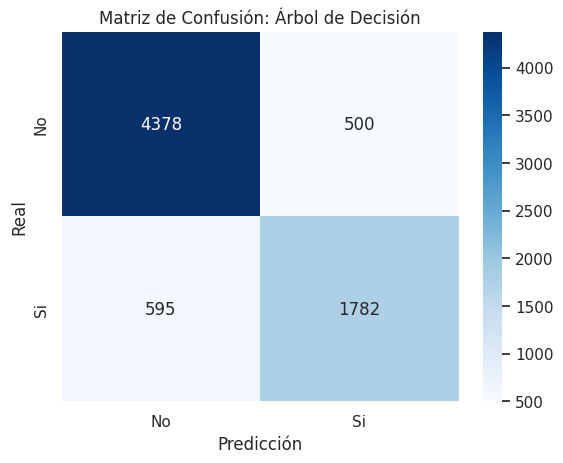

In [27]:
#Matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Si'], yticklabels=['No', 'Si'])
plt.title("Matriz de Confusión: Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Random Forest**

In [28]:
#Entrenar el modelo
rand_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
rand_forest.fit(X_train_scaled, y_train)

#Evaluar el modelo
y_pred_rf = rand_forest.predict(X_test_scaled)
print("Reporte de Clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4878
           1       0.81      0.75      0.78      2377

    accuracy                           0.86      7255
   macro avg       0.85      0.83      0.84      7255
weighted avg       0.86      0.86      0.86      7255



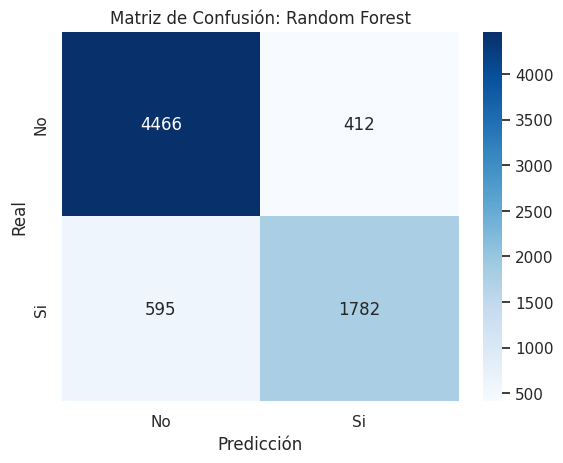

In [29]:
#Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Si'], yticklabels=['No', 'Si'])
plt.title("Matriz de Confusión: Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**XGBoost**

In [30]:
#Entrenar el modelo
xgb = XGBClassifier(random_state=42, eval_metric="logloss")
xgb.fit(X_train_scaled, y_train)

#Evaluar el modelo
y_pred_xgb = xgb.predict(X_test_scaled)
print("Reporte de Clasificación para XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Reporte de Clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4878
           1       0.85      0.69      0.76      2377

    accuracy                           0.86      7255
   macro avg       0.85      0.82      0.83      7255
weighted avg       0.86      0.86      0.85      7255



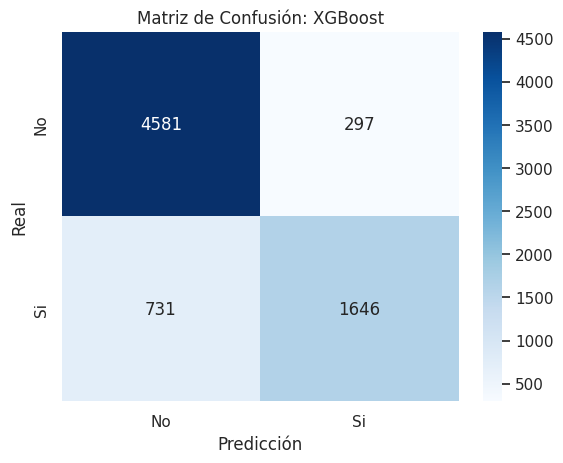

In [31]:

#Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Si'], yticklabels=['No', 'Si'])
plt.title("Matriz de Confusión: XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Resumen de los datos obtenidos**

In [33]:
# Crear un diccionario con los resultados
resultados = {
    "Modelo": ["Regresión Logística", "Árbol de Decisión", "Random Forest", "XGBoost", "KNN"],
    "Precisión": [0.78, 0.85, 0.86, 0.86, 0.85],
    "Recall": [0.79, 0.85, 0.86, 0.86, 0.85],
    "F1-score": [0.78, 0.85, 0.86, 0.86, 0.83],
    "AUC-ROC": [0.74, 0.83, 0.84, 0.83, 0.84]
}

# Convertir en DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar la tabla
print(df_resultados)


                Modelo  Precisión  Recall  F1-score  AUC-ROC
0  Regresión Logística       0.78    0.79      0.78     0.74
1    Árbol de Decisión       0.85    0.85      0.85     0.83
2        Random Forest       0.86    0.86      0.86     0.84
3              XGBoost       0.86    0.86      0.86     0.83
4                  KNN       0.85    0.85      0.83     0.84


Después de entrenar y evaluar distintos modelos de clasificación para predecir la cancelación de reservas, encontramos diferencias en su desempeño.

El modelo de Regresión Logística mostró un desempeño aceptable pero inferior a los modelos más complejos, con una precisión del 78% y un AUC-ROC de 0.74, lo que indica que tiene limitaciones para capturar relaciones no lineales en los datos.

El Árbol de Decisión y KNN obtuvieron mejores métricas, con una precisión del 85% y 85%, respectivamente. Sin embargo, estos modelos pueden ser más sensibles al sobreajuste, especialmente el Árbol de Decisión si no se ajustan correctamente sus hiperparámetros.

Por otro lado, XGBoost y Random Forest lograron los mejores resultados generales, con una precisión del 86% y un AUC-ROC de aproximadamente 0.84. Ambos modelos capturan relaciones complejas en los datos, pero Random Forest se destaca por su estabilidad y menor sensibilidad a valores atípicos, lo que lo convierte en una opción más confiable.

Random Forest es el modelo más adecuado porque combina un alto rendimiento con una buena capacidad de generalización. Su enfoque basado en múltiples árboles de decisión reduce el sobreajuste y ofrece predicciones más robustas.

**Definir hiperparametros para mejorar modelo**

In [34]:
# Definir hiperparámetros a probar utilizando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Inicializar modelo
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo
print(grid_search.best_params_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


**max_depth:** 20 → La profundidad máxima de los árboles se establece en 20, lo que ayuda a controlar el sobreajuste al evitar árboles demasiado profundos.

**max_features:** 'sqrt' → En cada división, el modelo considera la raíz cuadrada del total de características disponibles, lo que mejora la eficiencia y reduce la correlación entre los árboles.

**min_samples_leaf:** 1 → Se permite que los nodos hoja contengan al menos una muestra, lo que puede hacer que el modelo sea más detallado.

**min_samples_split:** 5 → Un nodo debe tener al menos 5 muestras para dividirse, lo que previene divisiones innecesarias y ayuda a la generalización.

**n_estimators:** 200 → Se utilizan 200 árboles en el bosque, lo que mejora la estabilidad del modelo sin incrementar demasiado el costo computacional.

**Entrenar el modelo con los mejores hiperparametros**

In [35]:
# Entrenar el modelo con los mejores hiperparámetros
best_rf = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluación del modelo

print("Reporte de Clasificación para Random Forest Optimizado:")
print(classification_report(y_test, y_pred_best_rf))

# Calcular AUC-ROC
auc_roc_best_rf = roc_auc_score(y_test, y_pred_best_rf)
print(f"AUC-ROC: {auc_roc_best_rf:.4f}")


Reporte de Clasificación para Random Forest Optimizado:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4878
           1       0.85      0.74      0.79      2377

    accuracy                           0.87      7255
   macro avg       0.86      0.84      0.85      7255
weighted avg       0.87      0.87      0.87      7255

AUC-ROC: 0.8383


La optimización de hiperparámetros ha permitido mejorar el rendimiento del modelo, haciendo de Random Forest Optimizado la mejor opción para la predicción de cancelaciones de reservas en este análisis.

#Conclusión General

En este trabajo, se llevó a cabo un análisis predictivo para determinar la cancelación de reservas en un hotel, utilizando diversas técnicas de clasificación. A través del análisis exploratorio de datos (EDA), se identificaron las variables más relevantes y se preparó el conjunto de datos mediante escalado y codificación.

Se probaron múltiples modelos de clasificación, incluyendo Regresión Logística, Árbol de Decisión, Random Forest, XGBoost y KNN, evaluando su desempeño con métricas como precisión, recall, F1-score y AUC-ROC. Tras la comparación de los resultados, se determinó que Random Forest optimizado ofrecía el mejor equilibrio entre rendimiento y capacidad de generalización, siendo seleccionado como el modelo más adecuado para la predicción.

Este modelo puede ser de gran utilidad para el hotel, permitiendo anticipar cancelaciones con mayor precisión y, en consecuencia, optimizar la gestión de reservas, mejorar la planificación y minimizar pérdidas económicas.

#Futuras lineas
Como trabajo futuro, se podrían explorar más variables, probar técnicas de balanceo de clases y considerar enfoques más avanzados como redes neuronales para mejorar aún más la precisión de las predicciones.